<a href="https://colab.research.google.com/github/pankajr141/experiments/blob/master/Reasoning/Reinforcement/Reasoning%20%7BRL%7D%20-%201%3A%20Q_Agents_Table%20%26%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Source -** https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0


https://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/

The Goal is to solve the below Problem using Reinforcement Learning.

In [0]:
import gym
import numpy as np

In [0]:
env = gym.make('FrozenLake-v0')
env.render()


SFFF
FHFH
FFFH
HFFG


## Solution using Tables

Here we will try to implement a simple Q learning using Bellman Equation on S x A Matrix, where S(States), A(Action) are parameters.

we have 16 possible states (one for each block), and 4 possible actions (the four directions of movement), giving us a 16x4 table of Q-values.




---

Bellman equation, which states that the expected long-term reward for a given action is equal to the immediate reward from the current action combined with the expected reward from the best future action taken at the following state.

In [0]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])

# Set learning parameters
lr = .8
y = .95 # Discount on future rewards
num_episodes = 2001

#create lists to contain total rewards and steps per episode
rList = []

for i in range(num_episodes):
  
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
      
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1, r, d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y * np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)
    if i and i % 100 == 0:
      print ("Score over time: Ep (%d) avg  %f" % (i, sum(rList[0:i]) / i))

Score over time: Ep (100) avg  0.080000
Score over time: Ep (200) avg  0.135000
Score over time: Ep (300) avg  0.250000
Score over time: Ep (400) avg  0.350000
Score over time: Ep (500) avg  0.406000
Score over time: Ep (600) avg  0.443333
Score over time: Ep (700) avg  0.477143
Score over time: Ep (800) avg  0.503750
Score over time: Ep (900) avg  0.518889
Score over time: Ep (1000) avg  0.540000
Score over time: Ep (1100) avg  0.550909
Score over time: Ep (1200) avg  0.557500
Score over time: Ep (1300) avg  0.556923
Score over time: Ep (1400) avg  0.561429
Score over time: Ep (1500) avg  0.566000
Score over time: Ep (1600) avg  0.575000
Score over time: Ep (1700) avg  0.575882
Score over time: Ep (1800) avg  0.575000
Score over time: Ep (1900) avg  0.578947
Score over time: Ep (2000) avg  0.585500


In [0]:
print("Final Q-Table Values")
Q

Final Q-Table Values


array([[3.21358182e-03, 3.15028886e-03, 1.05947225e-01, 3.23515059e-03],
       [1.56133148e-03, 1.32661196e-03, 5.05522090e-04, 5.24608463e-02],
       [1.92099234e-03, 5.72468861e-04, 9.98522462e-04, 2.62455807e-02],
       [2.10938848e-04, 3.88900264e-04, 2.39120315e-05, 1.54611617e-02],
       [1.12725732e-01, 4.89212510e-06, 5.21552773e-04, 7.04806937e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.93895867e-05, 2.36144390e-04, 7.21712383e-03, 5.38217366e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.44017246e-04, 1.93254501e-03, 5.81177337e-04, 2.94874743e-01],
       [1.73472480e-03, 5.85618258e-01, 3.55156209e-04, 1.17055786e-03],
       [7.63564504e-02, 8.52494392e-04, 7.80112257e-06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.47728995e

## Using Neural Networks

Now We can always use tables, but in real world scenario states can be infinite so we cannot create a infinite length table. So we need to go for some approximation, NN provides these approximation.

In [0]:
import tensorflow as tf
tf.reset_default_graph()

#These lines establish the feed-forward part of the network used to choose actions
inputs = tf.placeholder(shape=[1, 16],dtype=tf.float32)  # Current state
W = tf.Variable(tf.random_uniform([16, 4], 0, 0.01))

Qout = tf.matmul(inputs, W)
predict = tf.argmax(Qout, 1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1, 4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [0]:
init = tf.initialize_all_variables()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000

#create lists to contain total rewards and steps per episode
jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False # Death
        j = 0  # Number of steps in this episode
        
        #The Q-Network, we are limiting the steps to 100
        while j < 99:
            j+=1
            
            ''' 
            We need few values to feed as per bellman equation 
            Current state Q values (Q0), Next best state Q value(Q1). Reward Next State (r)
            Then Apply Bellman.
            '''
            
            #Choose an action by greedily (with e chance of random action) from the Q-network
            # np.identity(16)[s:s+1] is one hot vector with s set as 1 
            # Qout Will be 1x4 [[0.00872229 0.00494494 0.00930803 0.00975112]] vector
            a, Q0 = sess.run([predict, Qout], feed_dict={inputs: np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            
            #Get new state and reward from environment
            s_new, r, d, _ = env.step(a[0])
            
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout, feed_dict={inputs:np.identity(16)[s_new:s_new+1]})
            
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = Q0
            
            '''Bellman'''
            targetQ[0, a[0]] = r + y * maxQ1 # Current state reward + Discounted (max of future states)
            
            #Train our network using target and predicted Q values
            _, W1 = sess.run([updateModel, W], feed_dict={inputs:np.identity(16)[s:s+1], nextQ:targetQ})
            rAll += r
            s = s_new
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break

        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of succesful episodes: 0.4945%


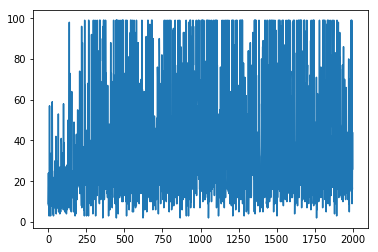

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(jList)

While the network learns to solve the FrozenLake problem, it turns out it doesn’t do so quite as efficiently as the Q-Table. While neural networks allow for greater flexibility, they do so at the cost of stability when it comes to Q-Learning. There are a number of possible extensions to our simple Q-Network which allow for greater performance and more robust learning. Two tricks in particular are referred to as Experience Replay and Freezing Target Networks.